# Figure S5: Uncertainties
This notebook produces figure S1 of Tankersley et al. 2022. This is a 4 panel figure showing the uncertainties of the two mains results of this study; basement topography and sediment thickness. Lower limits are in a) and c), upper limits are in b) and d).

In [1]:
# import necessary python packages
import pygmt
import geopandas as gpd
import os

In [2]:
# all file paths assume this notebook is in /RIS_basement_sediment/figures
pwd = os.getcwd()
pwd

'C:\\Users\\mtankersley\\Documents\\Python_Scripts\\RIS_basement_sediment\\Figures'

## Color scales

In [3]:
# create colorscales
# basement
pygmt.makecpt(series = '-4000/0/17+n', cmap='batlowW',
              background='o', output='../data/plotting/basement.cpt')
# sediment
sed_cmap_lim='0/3500' 
pygmt.makecpt(cmap = 'acton', series = f'{sed_cmap_lim}/15+n', reverse = True,
              output = '../data/plotting/sediment.cpt', background='o')  


## Figure parameters

In [4]:
# set our PyGMT figure parameters, 
# we will use an Antarctic Polar Stereographic projection (EPSG3031)
# set the region of our figure, in meters from the South Pole
e= -660_000
n= -1_500_000
w= 450_000
s= -400_000

#set figure height, width and map scale
fig_height = 180 # in mm
fig_width = fig_height*(w-e)/(s-n)
fig_ratio = (s-n)/(fig_height/1000)

# Make a GMT region string and projection strings in both ESPG3031 and Lat/Lon
fig_reg = f'{e}/{w}/{n}/{s}'
fig_proj = f"x1:{fig_ratio}"
fig_proj_ll = f"s0/-90/-71/1:{fig_ratio}"

subsize=f'{fig_width/10}c/{fig_height/10}c'

## Figure function

In [5]:
def subplots(grid, cmap, shading=()):
    with pygmt.config(MAP_FRAME_TYPE = 'inside'):
        fig.grdimage(region = fig_reg, projection = fig_proj, frame=["nwse", "xf100000", "yf100000", "g0"], 
                     grid=grid, cmap=cmap, shading=shading, nan_transparent=True, panel=True, dpi=500)
    
    # plot graticules overtop, at 4d latitude and 30d longitude
    with pygmt.config(MAP_ANNOT_OFFSET_PRIMARY = '-2p', MAP_FRAME_TYPE = 'inside',
                      MAP_ANNOT_OBLIQUE = 0, FONT_ANNOT_PRIMARY = '8p,black,-=2p,white', 
                      MAP_GRID_PEN_PRIMARY = 'grey', MAP_TICK_LENGTH_PRIMARY = '-10p',
                      MAP_TICK_PEN_PRIMARY = 'thinnest,grey', FORMAT_GEO_MAP = 'dddF',
                      MAP_POLAR_CAP = '90/90', ):
        fig.basemap(projection = fig_proj_ll, region = fig_reg,
                    frame = ["NSWE", "xa30g15", "ya4g2"], verbose='e')
        with pygmt.config(FONT_ANNOT_PRIMARY = '8p,black'):
            fig.basemap(projection = fig_proj_ll, region = fig_reg,
                    frame = ["NSWE", "xa30", "ya4"], verbose='e') 

    # plot groundingline and coastlines
    fig.plot(projection = fig_proj, data=gpd.read_file('../data/shapefiles/GroundingLine_Antarctica_v02.shp'), 
             pen = '1.2p,black', verbose='e')
    fig.plot(data=gpd.read_file('../data/shapefiles/Coastline_Antarctica_v02.shp'), 
             pen='1.2p,black', verbose='e')
    
def finish_subplots(cmap, frame):
    # COLORBAR
    bar_width = fig_width/10 * 0.8 # color bar width is 40% of the map width, in cm
    pos_str = f'jBC+w{bar_width}c+jTC+o0c/.2c+h+e'
    with pygmt.config(FONT_ANNOT_PRIMARY = '18p,black', FONT_LABEL = '24p,black'):
        fig.colorbar(cmap=cmap, position = pos_str, frame=frame, verbose='e')  

    # SCALEBAR
    with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '16p,black', MAP_SCALE_HEIGHT='8p', MAP_TICK_PEN_PRIMARY = '0.5p,black'):
        fig.basemap(region = fig_reg, projection = fig_proj_ll, map_scale='jBL+w200k+c170E/71S+f+l"km"+ar+o0.3c/0.6c', verbose='e') 

## Make figure

gmtset [WARNING]: Representation of font type not recognized. Using default.
C:\Users\mtankersley\miniforge3\envs\basement\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\mtankersley\miniforge3\envs\basement\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
gmtset [WARNING]: Representation of font type not recognized. Using default.
C:\Users\mtankersley\miniforge3\envs\basement\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\mtankersley\miniforge3\envs\basement\lib\site-packages\ge

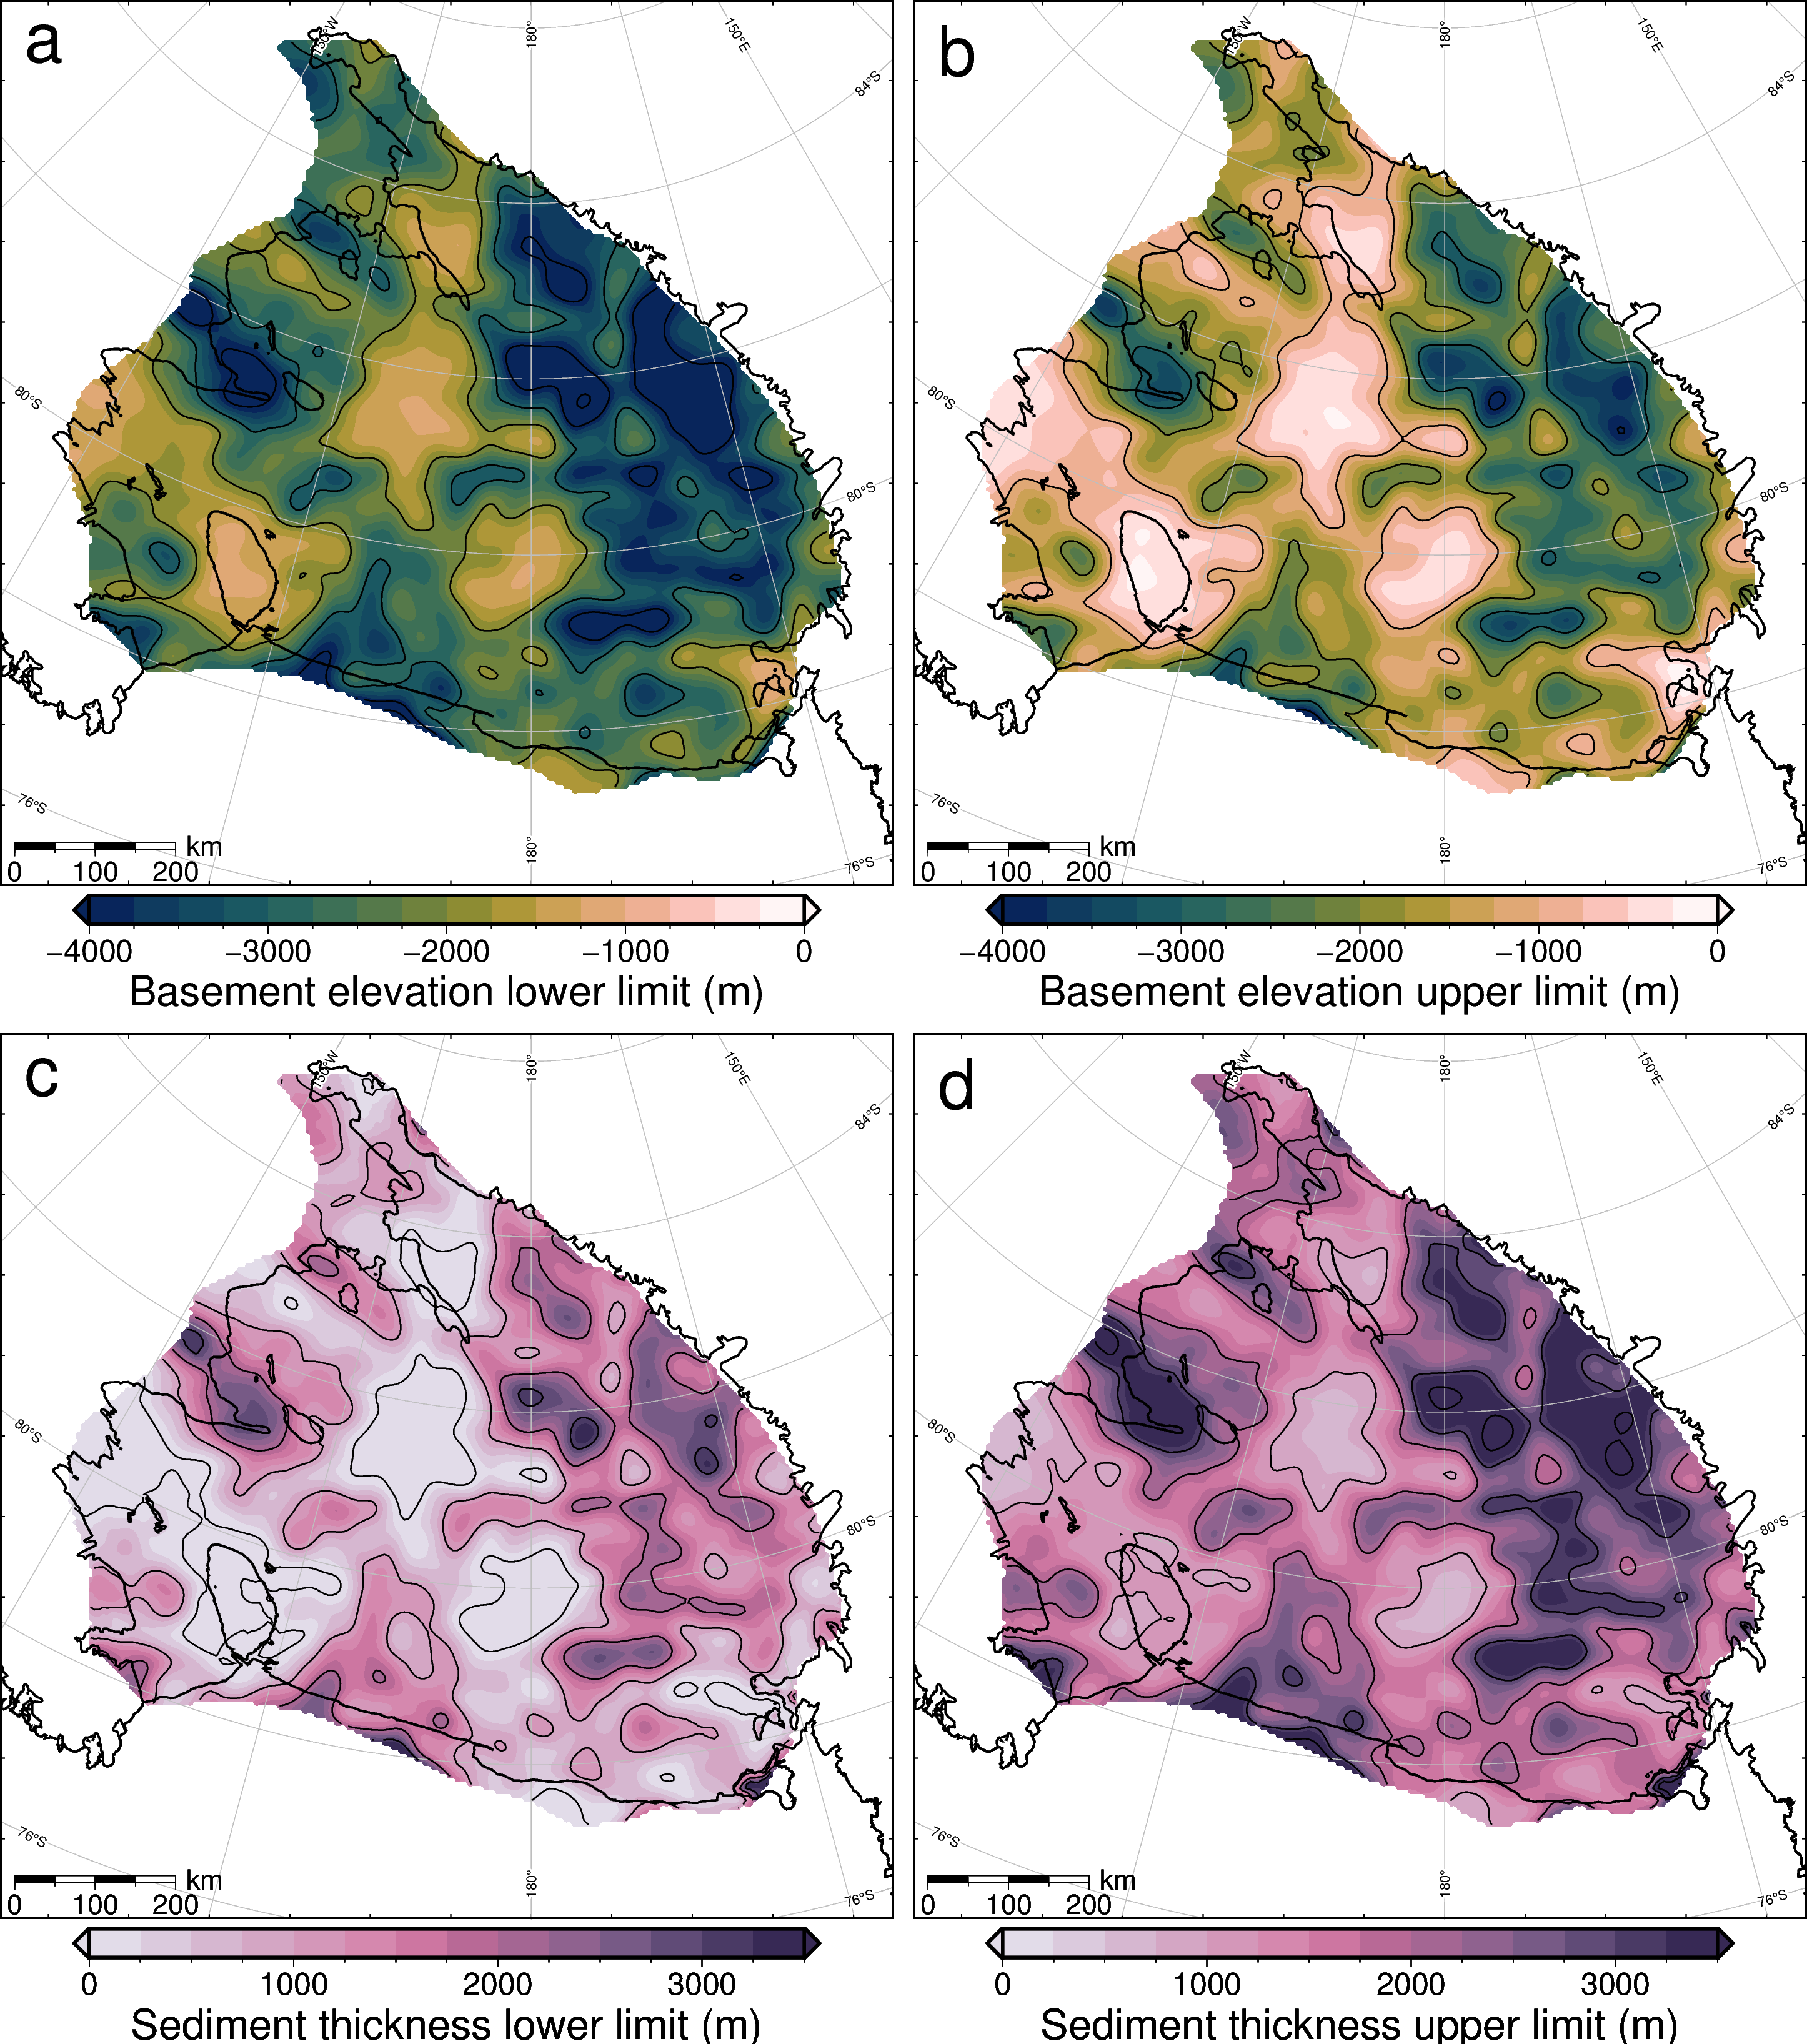

In [6]:
fig = pygmt.Figure()
with fig.subplot(nrows=2, ncols=2, subsize=subsize, margins=['.2c','.2c','2c','1c'], frame="lrtb"):
############################
############################
# 1st FIGURE Lower Basement
############################
############################
    grid='../data/main_results/RIS_basement_filt_uncert_lower.nc'
    cmap='../data/plotting/basement.cpt'
    frame=['xa1000f250+l"Basement elevation lower limit (m)"']
    
    subplots(grid, cmap) 
    fig.grdcontour(grid=grid, interval=1000, pen='thin,black')
    finish_subplots(cmap, frame)
    fig.text(projection = fig_proj, 
            region = fig_reg,
            position='TL',
            text = "a",
            fill = 'white',
            font = '40p,Helvetica,black',
            offset = 'j.5/.5',
            clearance = '+tO')
############################
###########################
# 2nd FIGURE Upper Basement 
############################
############################
    grid='../data/main_results/RIS_basement_filt_uncert_upper.nc'
    cmap='../data/plotting/basement.cpt'
    frame=['xa1000f250+l"Basement elevation upper limit (m)"']
    
    subplots(grid, cmap) 
    fig.grdcontour(grid=grid, interval=1000, pen='thin,black')
    finish_subplots(cmap, frame)
    fig.text(projection = fig_proj, 
            region = fig_reg,
            position='TL',
            text = "b",
            fill = 'white',
            font = '40p,Helvetica,black',
            offset = 'j.5/.5',
            clearance = '+tO')
############################
###########################
# 3rd FIGURE Lower Sed Thick  
############################
############################
    grid='../data/main_results/RIS_sediment_uncert_lower.nc'
    cmap='../data/plotting/sediment.cpt'
    frame=['xa1000f250+l"Sediment thickness lower limit (m)"']
    
    subplots(grid, cmap) 
    fig.grdcontour(grid=grid, interval=1000, pen='thin,black')
    finish_subplots(cmap, frame)
    finish_subplots(cmap, frame)
    fig.text(projection = fig_proj, 
            region = fig_reg,
            position='TL',
            text = "c",
            fill = 'white',
            font = '40p,Helvetica,black',
            offset = 'j.5/.5',
            clearance = '+tO')
############################
###########################
# 4th FIGURE Upper Sed Thick  
############################
############################
    grid='../data/main_results/RIS_sediment_uncert_upper.nc'
    cmap='../data/plotting/sediment.cpt'
    frame=['xa1000f250+l"Sediment thickness upper limit (m)"']
    
    subplots(grid, cmap) 
    fig.grdcontour(grid=grid, interval=1000, pen='thin,black')
    finish_subplots(cmap, frame)
    finish_subplots(cmap, frame)
    fig.text(projection = fig_proj, 
            region = fig_reg,
            position='TL',
            text = "d",
            fill = 'white',
            font = '40p,Helvetica,black',
            offset = 'j.5/.5',
            clearance = '+tO')
fig.show(dpi=200)

## Save figure

In [55]:
out='outputs/FigS5_uncertainties.jpg'
fig.savefig(out, dpi=200)

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.
